В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

## Завдання 1

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
medical_df = pd.read_csv('C:/Users/Ivanna/Documents/Dataset/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [2]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

### Модель лінійної регресії метод найменших квадратів

In [178]:
# визначаємо матрицю дизайну та вектор спостережень
X = non_smoker_df.age
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
y = non_smoker_df.charges

In [179]:
X_with_intercept, type(X_with_intercept), type(X), type(y)

(array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.],
        ...,
        [ 1., 18.],
        [ 1., 18.],
        [ 1., 21.]], shape=(1064, 2)),
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [80]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [180]:
# коефіціенти
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [181]:
# точкова перевірка першого передбачення
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(2719.059874396516)

In [182]:
# всі передбачувані значення
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [183]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [184]:
# точність прогнозу RMSE
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [185]:
rmse_MNK = rmse(y, predictions_MNK)
rmse_MNK

np.float64(4662.505766636395)

In [186]:
# знайдені коеф, передбачені значення, точність прогнозу RMSE
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Передбачення з МНК', predictions_MNK[:5])
print('RMSE МНК: ', rmse_MNK)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Передбачення з МНК [2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]
RMSE МНК:  4662.505766636395


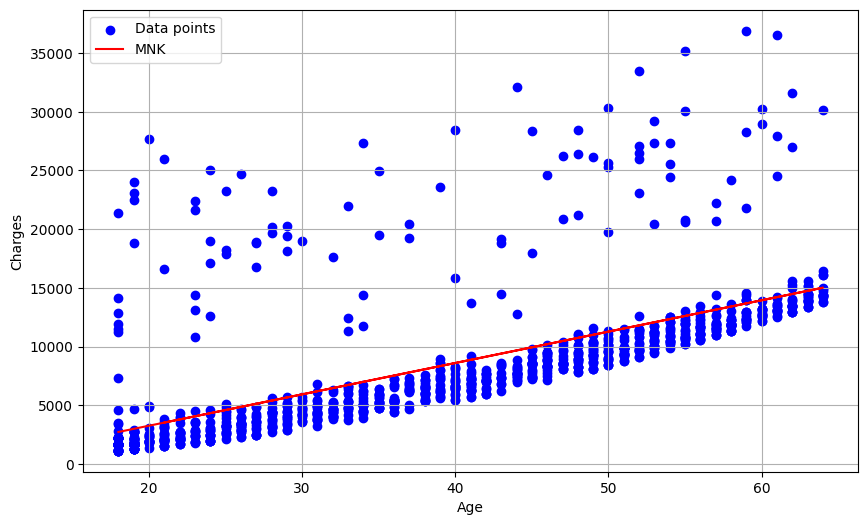

In [187]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

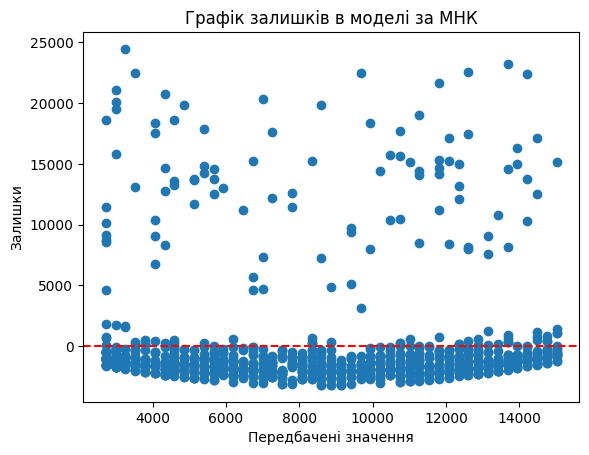

In [188]:
# аналіз залишків
errors_MNK = y - predictions_MNK

plt.scatter(predictions_MNK, errors_MNK)
plt.axhline(y=0, color='red', linestyle='--') # лінія ідеального прогнозу
plt.title('Графік залишків в моделі за МНК')
plt.xlabel('Передбачені значення')
plt.ylabel('Залишки')
plt.show()

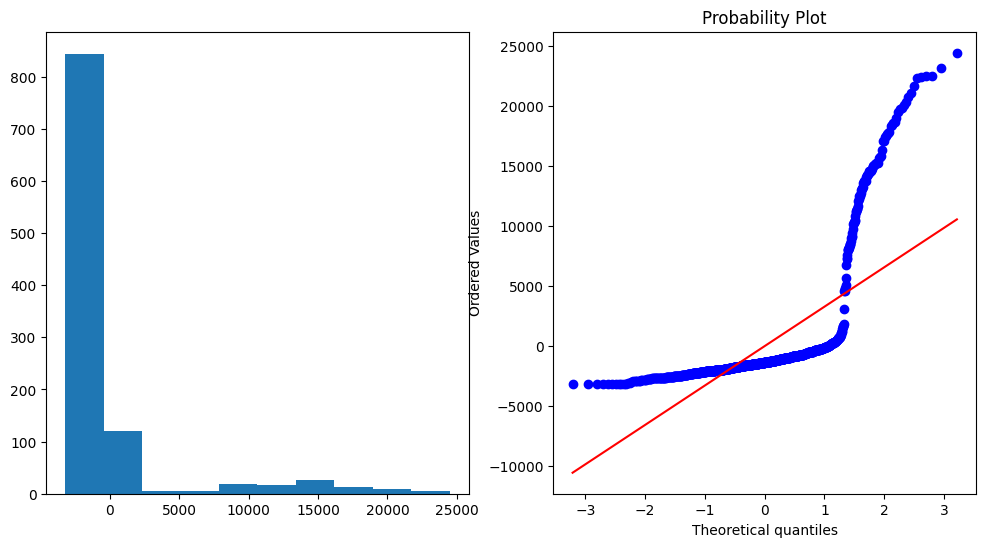

In [189]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors_MNK)
plt.subplot(1,2,2)
probplot(errors_MNK, dist='norm', plot=plt);

**Спостереження:**
- На графіку залишків чітко виділяються верхні точки (позитивні залишки понад 5000). Це свідчить про те, що для частини клієнтів реальні витрати значно вищі, ніж передбачає модель. Це може бути пов'язано з іншими факторами, такими як BMI або наявність хронічних захворювань.
- Розподіл помилок не є нормальним.

### Модель лінійної регресії Full-Batch градієнтного спуску

In [191]:
X = X.values.reshape(-1, 1)

In [192]:
X.shape, type(X)

((1064, 1), numpy.ndarray)

In [203]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

#### lr=0.001, epochs=100

In [252]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.001, epochs=100)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(-1.3967624262082842e+42), np.float64(-3.1448925830775484e+40))

In [238]:
rmse_fbgd = rmse(y, predictions_fbgd)
rmse_fbgd

np.float64(5.844970923943406e+43)

In [239]:
# знайдені коеф, передбачені значення, точність прогнозу Full-Batch градієнтного спуску
print('Коефіцієнти з Full-Batch градієнтного спуску: ', b, m)
print('Передбачення з Full-Batch градієнтного спуску', predictions_fbgd[:5])
print('RMSE Full-Batch градієнтного спуску: ', rmse_fbgd)

Коефіцієнти з Full-Batch градієнтного спуску:  -3.1448925830775484e+40 -1.3967624262082842e+42
Передбачення з Full-Batch градієнтного спуску [-2.51731726e+43 -3.91407969e+43 -4.61246090e+43 -4.47278466e+43
 -4.33310841e+43]
RMSE Full-Batch градієнтного спуску:  5.844970923943406e+43


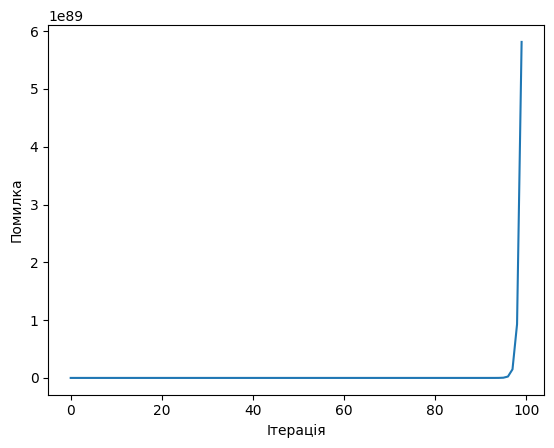

In [240]:
# графік помилок на кожній ітерації для першого варіанту
plt.plot(errors)
plt.xlabel('Ітерація')
plt.ylabel('Помилка')
plt.show()

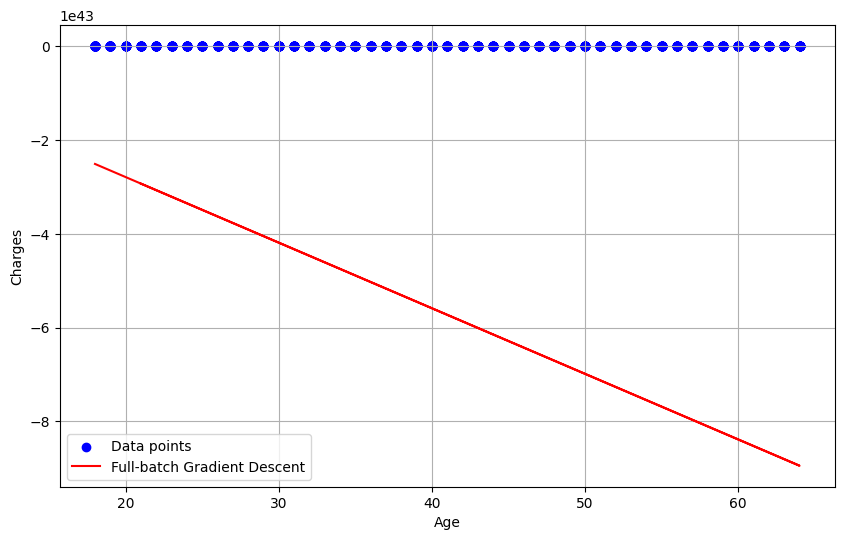

In [253]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd, color='red', label='Full-batch Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

#### lr=0.0001, epochs=200

In [335]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=200)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(220.26107384763154), np.float64(-4.517864430930102))

In [336]:
rmse_fbgd = rmse(y, predictions_fbgd)
rmse_fbgd

np.float64(4715.112306681941)

In [337]:
# знайдені коеф, передбачені значення, точність прогнозу Full-Batch градієнтного спуску
print('Коефіцієнти з Full-Batch градієнтного спуску: ', b, m)
print('Передбачення з Full-Batch градієнтного спуску', predictions_fbgd[:5])
print('RMSE Full-Batch градієнтного спуску: ', rmse_fbgd)

Коефіцієнти з Full-Batch градієнтного спуску:  -4.517864430930102 220.26107384763154
Передбачення з Full-Batch градієнтного спуску [3960.18146483 6162.7922033  7264.09757254 7043.83649869 6823.57542485]
RMSE Full-Batch градієнтного спуску:  4715.112306681941


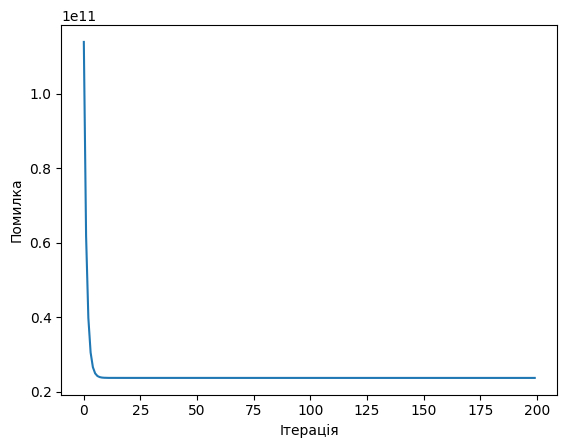

In [338]:
# графік помилок на кожній ітерації для першого варіанту
plt.plot(errors)
plt.xlabel('Ітерація')
plt.ylabel('Помилка')
plt.show()

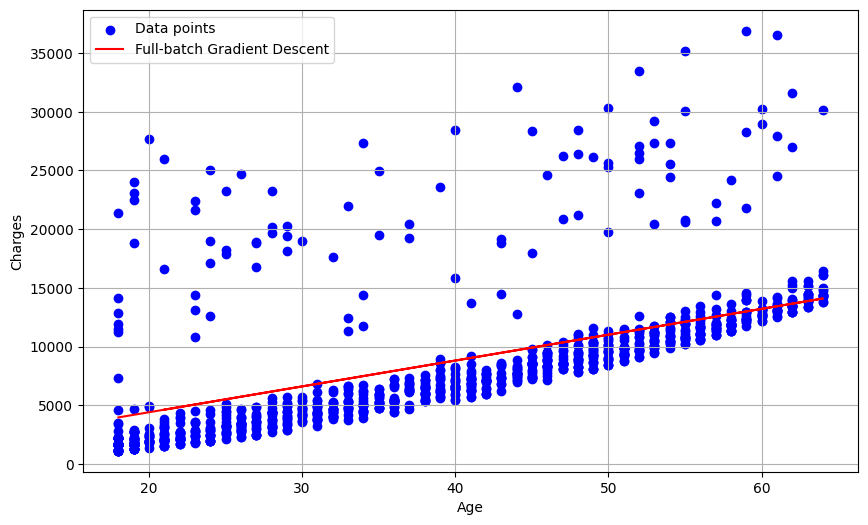

In [339]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd, color='red', label='Full-batch Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

#### lr=0.00001, epochs=200

In [340]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=200)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(219.89234776351717), np.float64(4.001365238258868))

In [341]:
# помилка
rmse_fbgd = rmse(y, predictions_fbgd)
rmse_fbgd

np.float64(4715.546273393858)

In [342]:
# знайдені коеф, передбачені значення, точність прогнозу Full-Batch градієнтного спуску
print('Коефіцієнти з Full-Batch градієнтного спуску: ', b, m)
print('Передбачення з Full-Batch градієнтного спуску', predictions_fbgd[:5])
print('RMSE Full-Batch градієнтного спуску: ', rmse_fbgd)

Коефіцієнти з Full-Batch градієнтного спуску:  4.001365238258868 219.89234776351717
Передбачення з Full-Batch градієнтного спуску [3962.06362498 6160.98710262 7260.44884143 7040.55649367 6820.66414591]
RMSE Full-Batch градієнтного спуску:  4715.546273393858


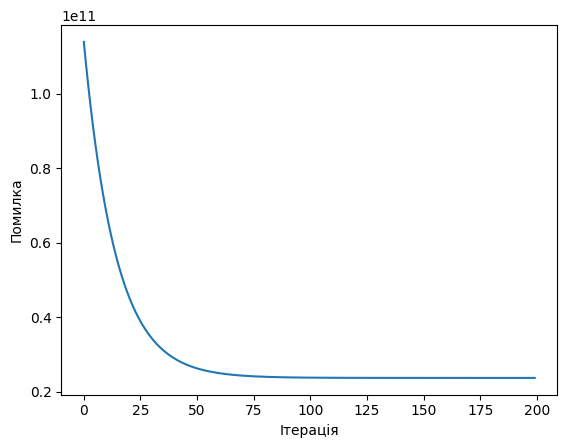

In [343]:
# графік помилок на кожній ітерації для першого варіанту
plt.plot(errors)
plt.xlabel('Ітерація')
plt.ylabel('Помилка')
plt.show()

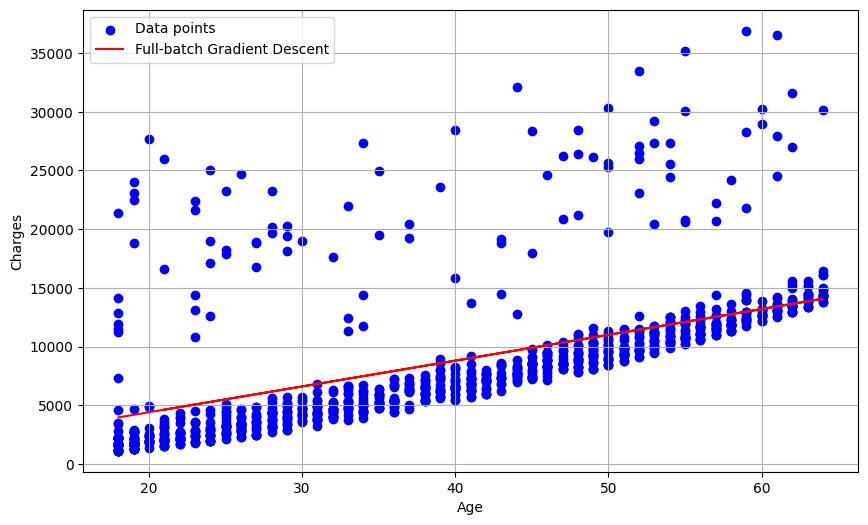

In [344]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd, color='red', label='Full-batch Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Спостереження:** 
Протестовано три пари learning rate та epochs
- lr=0.001, epochs=100
- lr=0.0001, epochs=200
- lr=0.00001, epochs=200

Результат на перших значеннях найгірший, градієнтний спуск розійшовся. Другий та третій мають близькі значення RMSE та їхні помилки прямують до нуля в обох варіантах. Я зупинюсь на третьому, бо графік помилок в цьому варіанті "ідеальний".

### Модель лінійної регресії засобами Scikit-learn (МНК)

In [153]:
from sklearn.linear_model import LinearRegression

In [159]:
type(X), X.shape

(numpy.ndarray, (1064, 1))

In [156]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression().fit(X, y)
predictions_sklearn = lin_reg.predict(X)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [163]:
# Обчислення loss через sklearn
loss_sklearn = root_mean_squared_error(y, predictions_sklearn)
loss_sklearn

4662.505766636395

In [168]:
# знадені коеф, передбачені значення, точність прогнозу RMSE
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_ )
print('Передбачення з sklearn', predictions_sklearn[:5])
print('RMSE з sklearn: ', loss_sklearn)

Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]
Передбачення з sklearn [2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]
RMSE з sklearn:  4662.505766636395


### Візуалізація

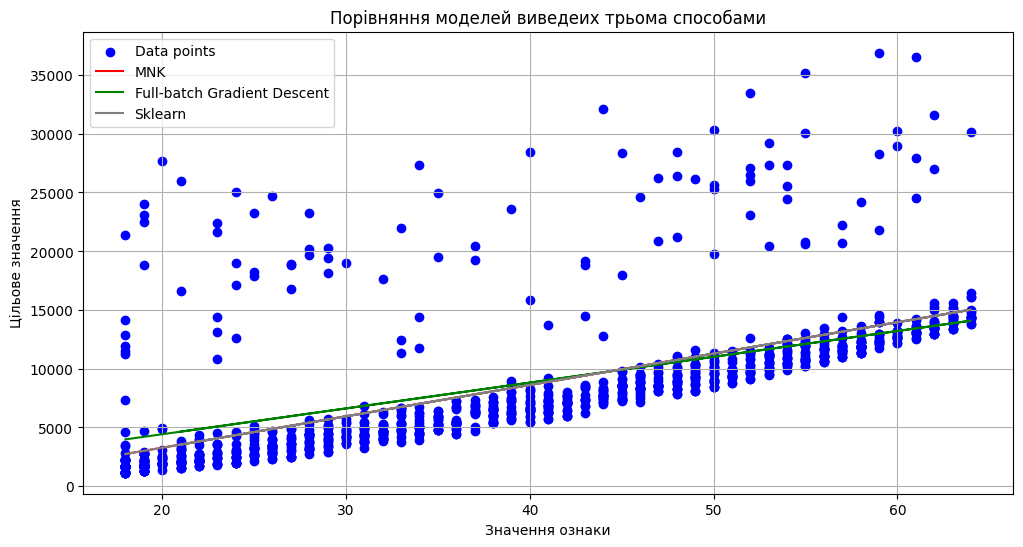

In [345]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Порівняння моделей виведеих трьома способами')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Спостереження:**
- Серед трьох моделей градієнтний метод нам дав найгірші результати (опираюсь на RMSE).
- Коеф. моделі за методом МНК:  m = 267.24891283, b = -2091.4205565650864
- Мої найкращі припущення в попередній дом.робооті були (280, -3800) дещо відрізняються, особливо вільний член b - майже вдвічі.

## Завдання 2

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [349]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [350]:
# Створюємо колонки незалежних змінних і цільової
X = smoker_df[['age']]
y = smoker_df.charges

In [362]:
# Створюємо та тренуємо модель
model = LinearRegression().fit(X, y)

# Генеруємо передбачення на основі вхідних даних (незалежних змінних)
predictions = model.predict(X)

# Обчислюємо втрати аби зрозуміти якість моделі
loss = root_mean_squared_error(y, predictions)
print('Loss:', loss)
print(f"Коефіцієнти: m = {model.coef_[0]}, b = {model.intercept_}")

Loss: 10711.00334810241
Коефіцієнти: m = 305.23760210982874, b = 20294.12812691597


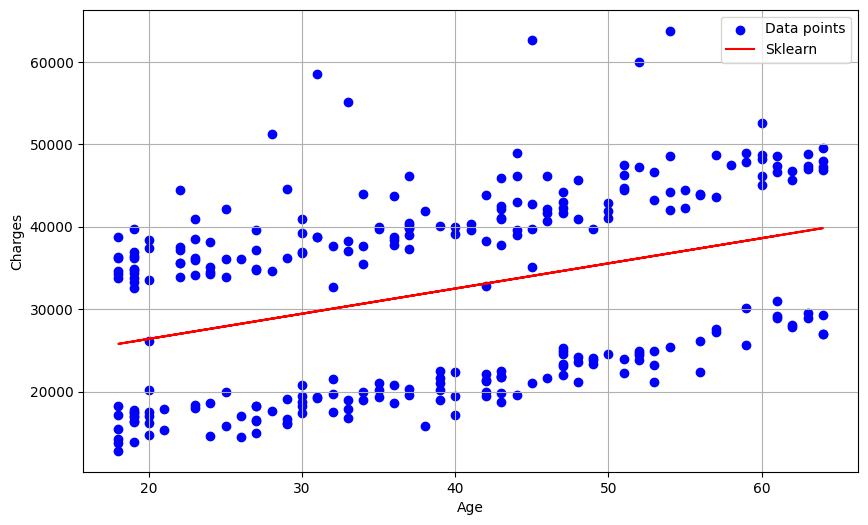

In [364]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Спостереження:**
- Дана модель має велику погана і не може бути використана для передбачення.
- Дані розділені на дві групи, це веде до висновку, що треба 2 різні моделі. Можливо, це так впливає статі чи якась інша ознака з датасету.